<a href="https://colab.research.google.com/github/riskydav/Belajar-Python/blob/main/Program_survey_lung_cancer.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

[link Referensi](https://www.kaggle.com/mysarahmadbhat/lung-cancer)

In [1]:
#import libraries
import pandas as pd
import numpy as np
from scipy import stats
import matplotlib.pyplot as plt
import seaborn as sns; sns.set()
import warnings

#suppress warnings
warnings.filterwarnings("ignore")

Ini adalah input dataset Survey Lung Cancer dari kaggle

In [2]:
!wget -O survey lung cancer.csv https://raw.githubusercontent.com/riskydav/Belajar-Python/main/Data/survey%20lung%20cancer.csv

--2021-10-12 08:45:12--  http://lung/
Resolving lung (lung)... failed: Name or service not known.
wget: unable to resolve host address ‘lung’
--2021-10-12 08:45:12--  http://cancer.csv/
Resolving cancer.csv (cancer.csv)... failed: Name or service not known.
wget: unable to resolve host address ‘cancer.csv’
--2021-10-12 08:45:12--  https://raw.githubusercontent.com/riskydav/Belajar-Python/main/Data/survey%20lung%20cancer.csv
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.109.133, 185.199.110.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.108.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 11277 (11K) [text/plain]
Saving to: ‘survey’

survey              100%[===================>]  11.01K  --.-KB/s    in 0s      

2021-10-12 08:45:12 (72.2 MB/s) - ‘survey’ saved [11277/11277]

FINISHED --2021-10-12 08:45:12--
Total wall clock time: 0.3s
Downloaded: 1 files, 11K in 0s (72.2 MB/

In [3]:
df = pd.read_csv('survey')

In [4]:
df.head()

,GENDER,AGE,SMOKING,YELLOW_FINGERS,ANXIETY,PEER_PRESSURE,CHRONIC DISEASE,FATIGUE,ALLERGY,WHEEZING,ALCOHOL CONSUMING,COUGHING,SHORTNESS OF BREATH,SWALLOWING DIFFICULTY,CHEST PAIN,LUNG_CANCER
0,M,69,1,2,2,1,1,2,1,2,2,2,2,2,2,YES
1,M,74,2,1,1,1,2,2,2,1,1,1,2,2,2,YES
2,F,59,1,1,1,2,1,2,1,2,1,2,2,1,2,NO
3,M,63,2,2,2,1,1,1,1,1,2,1,1,2,2,NO
4,F,63,1,2,1,1,1,1,1,2,1,2,2,1,1,NO


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 309 entries, 0 to 308
Data columns (total 16 columns):
 #   Column                 Non-Null Count  Dtype 
---  ------                 --------------  ----- 
 0   GENDER                 309 non-null    object
 1   AGE                    309 non-null    int64 
 2   SMOKING                309 non-null    int64 
 3   YELLOW_FINGERS         309 non-null    int64 
 4   ANXIETY                309 non-null    int64 
 5   PEER_PRESSURE          309 non-null    int64 
 6   CHRONIC DISEASE        309 non-null    int64 
 7   FATIGUE                309 non-null    int64 
 8   ALLERGY                309 non-null    int64 
 9   WHEEZING               309 non-null    int64 
 10  ALCOHOL CONSUMING      309 non-null    int64 
 11  COUGHING               309 non-null    int64 
 12  SHORTNESS OF BREATH    309 non-null    int64 
 13  SWALLOWING DIFFICULTY  309 non-null    int64 
 14  CHEST PAIN             309 non-null    int64 
 15  LUNG_CANCER            

In [6]:
df.describe()

,AGE,SMOKING,YELLOW_FINGERS,ANXIETY,PEER_PRESSURE,CHRONIC DISEASE,FATIGUE,ALLERGY,WHEEZING,ALCOHOL CONSUMING,COUGHING,SHORTNESS OF BREATH,SWALLOWING DIFFICULTY,CHEST PAIN
count,309.000000,309.000000,309.000000,309.000000,309.000000,309.000000,309.000000,309.000000,309.000000,309.000000,309.000000,309.000000,309.000000,309.000000
mean,62.673139,1.563107,1.569579,1.498382,1.501618,1.504854,1.673139,1.556634,1.556634,1.556634,1.579288,1.640777,1.469256,1.556634
std,8.210301,0.496806,0.495938,0.500808,0.500808,0.500787,0.469827,0.497588,0.497588,0.497588,0.494474,0.480551,0.499863,0.497588
min,21.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
25%,57.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
50%,62.000000,2.000000,2.000000,1.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,1.000000,2.000000
75%,69.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000
max,87.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000


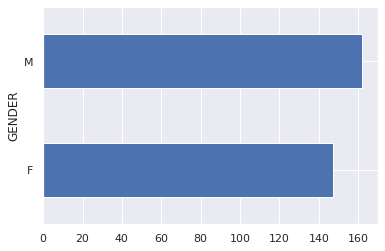

In [7]:
df.groupby('GENDER')["LUNG_CANCER"].size().plot(kind="barh")

In [8]:
dfAktifCancer=df.groupby('LUNG_CANCER').count()
dfAktifCancer

,GENDER,AGE,SMOKING,YELLOW_FINGERS,ANXIETY,PEER_PRESSURE,CHRONIC DISEASE,FATIGUE,ALLERGY,WHEEZING,ALCOHOL CONSUMING,COUGHING,SHORTNESS OF BREATH,SWALLOWING DIFFICULTY,CHEST PAIN
LUNG_CANCER,,,,,,,,,,,,,,,
NO,39,39,39,39,39,39,39,39,39,39,39,39,39,39,39
YES,270,270,270,270,270,270,270,270,270,270,270,270,270,270,270


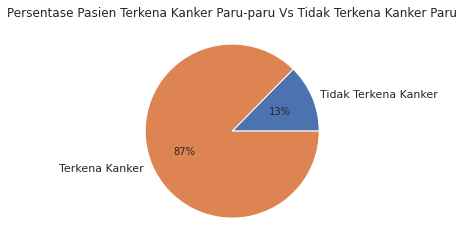

In [9]:
import matplotlib.pyplot as plt
plt.pie(dfAktifCancer['AGE'],labels=['Tidak Terkena Kanker','Terkena Kanker'],autopct='%1.0f%%')
plt.title('Persentase Pasien Terkena Kanker Paru-paru Vs Tidak Terkena Kanker Paru')
plt.show()

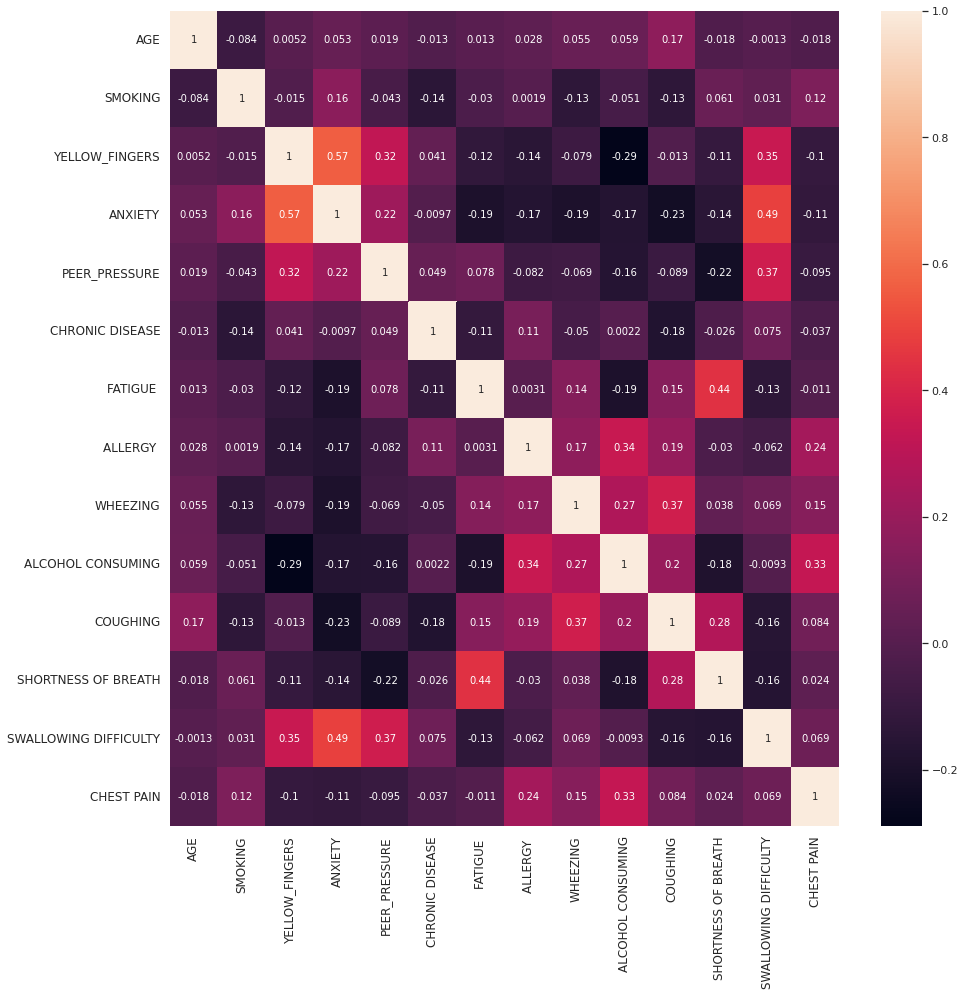

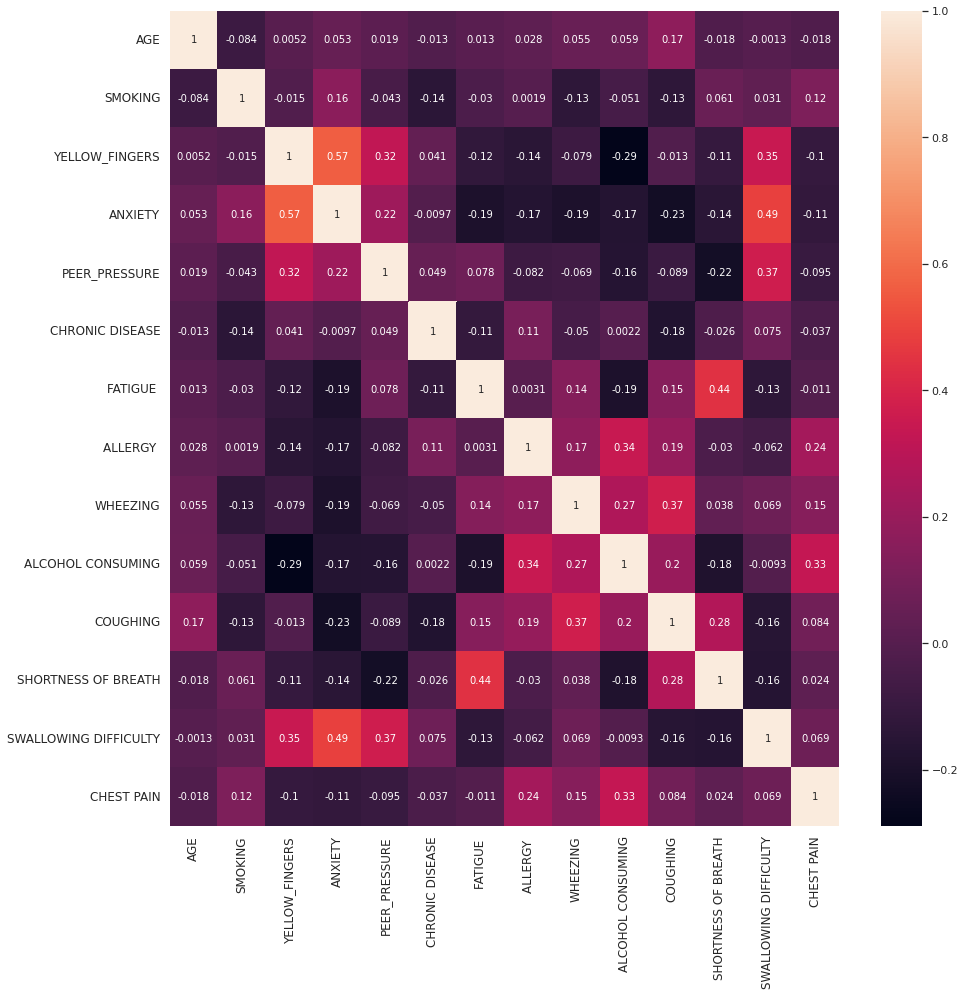

In [10]:
import seaborn as sns
dfKorelasi =df.corr() 
#sns.heatmap(dfKorelasi, annot=True,annot_kws={'size':12})

sns.heatmap(dfKorelasi, xticklabels=dfKorelasi.columns.values, yticklabels= dfKorelasi.columns.values, annot=True,annot_kws={'size':10})
heat_map=plt.gcf()
heat_map.set_size_inches(15,15)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.show()


import seaborn as sns
dfKorelasi =df.corr() 
#sns.heatmap(dfKorelasi, annot=True,annot_kws={'size':12})

sns.heatmap(dfKorelasi, xticklabels=dfKorelasi.columns.values, yticklabels= dfKorelasi.columns.values, annot=True,annot_kws={'size':10})
heat_map=plt.gcf()
heat_map.set_size_inches(15,15)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.show()

In [11]:
df.columns

Index(['GENDER', 'AGE', 'SMOKING', 'YELLOW_FINGERS', 'ANXIETY',
       'PEER_PRESSURE', 'CHRONIC DISEASE', 'FATIGUE ', 'ALLERGY ', 'WHEEZING',
       'ALCOHOL CONSUMING', 'COUGHING', 'SHORTNESS OF BREATH',
       'SWALLOWING DIFFICULTY', 'CHEST PAIN', 'LUNG_CANCER'],
      dtype='object')

In [12]:
#numerical features
numerical = [
    'AGE'
]

#categorical features
categorical = [
    'GENDER',
    'SMOKING',
    'YELLOW_FINGERS',
    'ANXIETY',
    'PEER_PRESSURE',
    'CHRONIC DISEASE',
    'FATIGUE ',
    'ALLERGY ',
    'WHEEZING',
    'ALCOHOL CONSUMING',
    'COUGHING',
    'SHORTNESS OF BREATH',
    'SWALLOWING DIFFICULTY',
    'CHEST PAIN',
    'LUNG_CANCER'
]

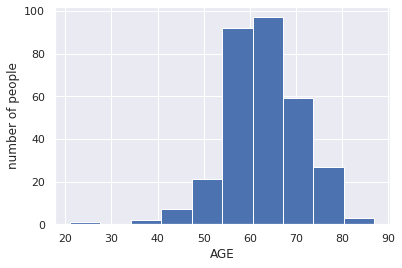

In [13]:
#look at numerical data distribution
for i in df[numerical].columns:
    plt.hist(df[numerical][i])
    plt.xticks()
    plt.xlabel(i)
    plt.ylabel('number of people')
    plt.show()

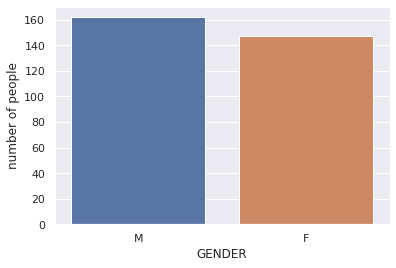

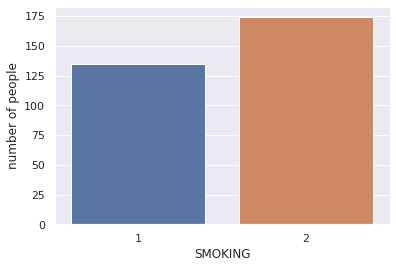

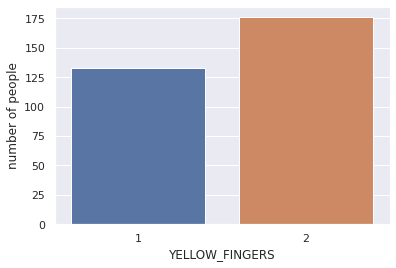

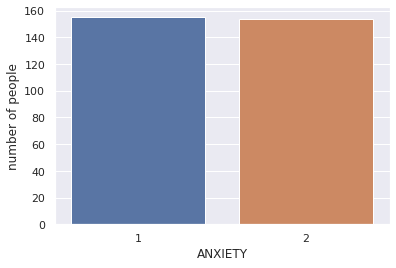

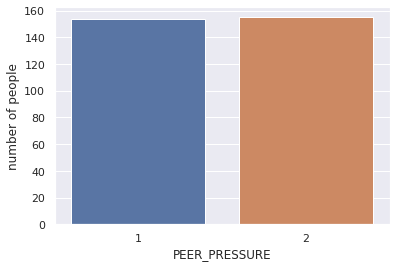

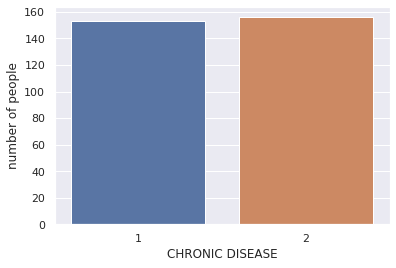

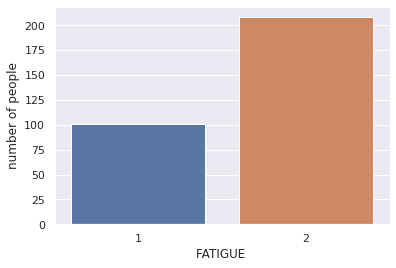

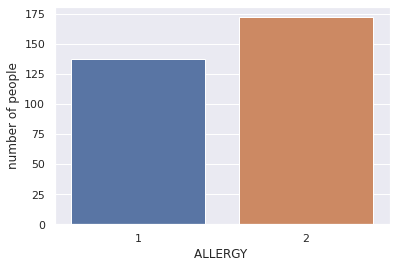

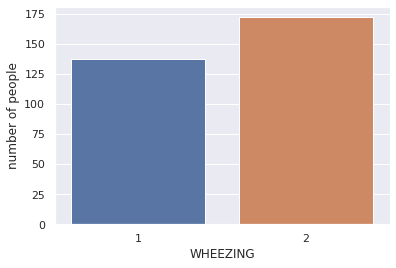

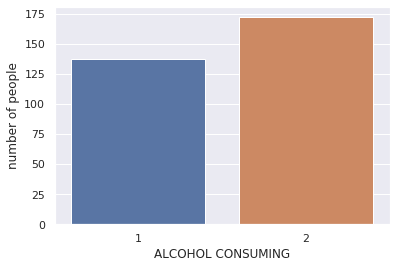

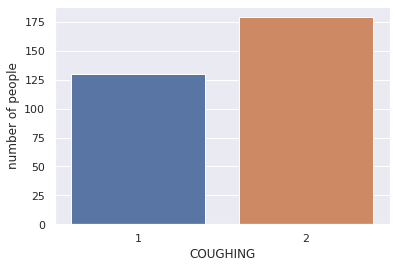

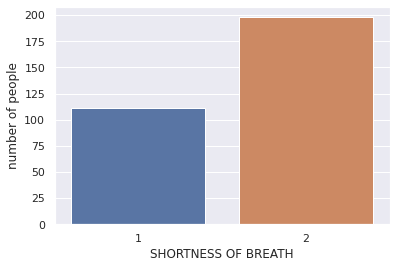

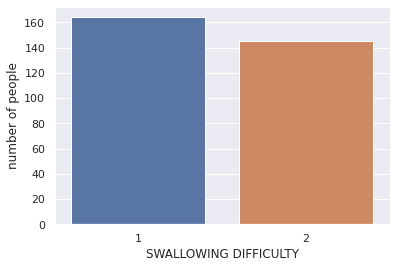

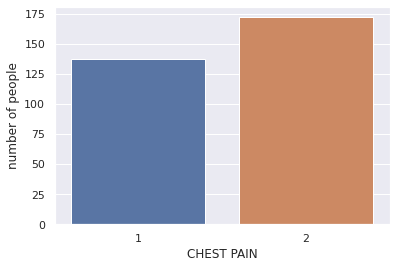

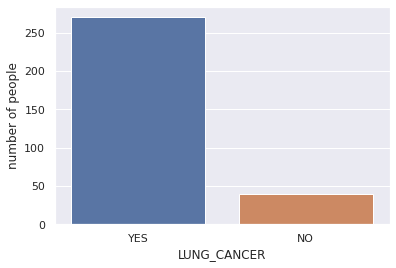

In [14]:
for i in df[categorical].columns:
    sns.barplot(x=df[categorical][i].value_counts().index,y=df[categorical][i].value_counts())
    plt.xlabel(i)
    plt.ylabel('number of people')
    plt.show()

No handles with labels found to put in legend.


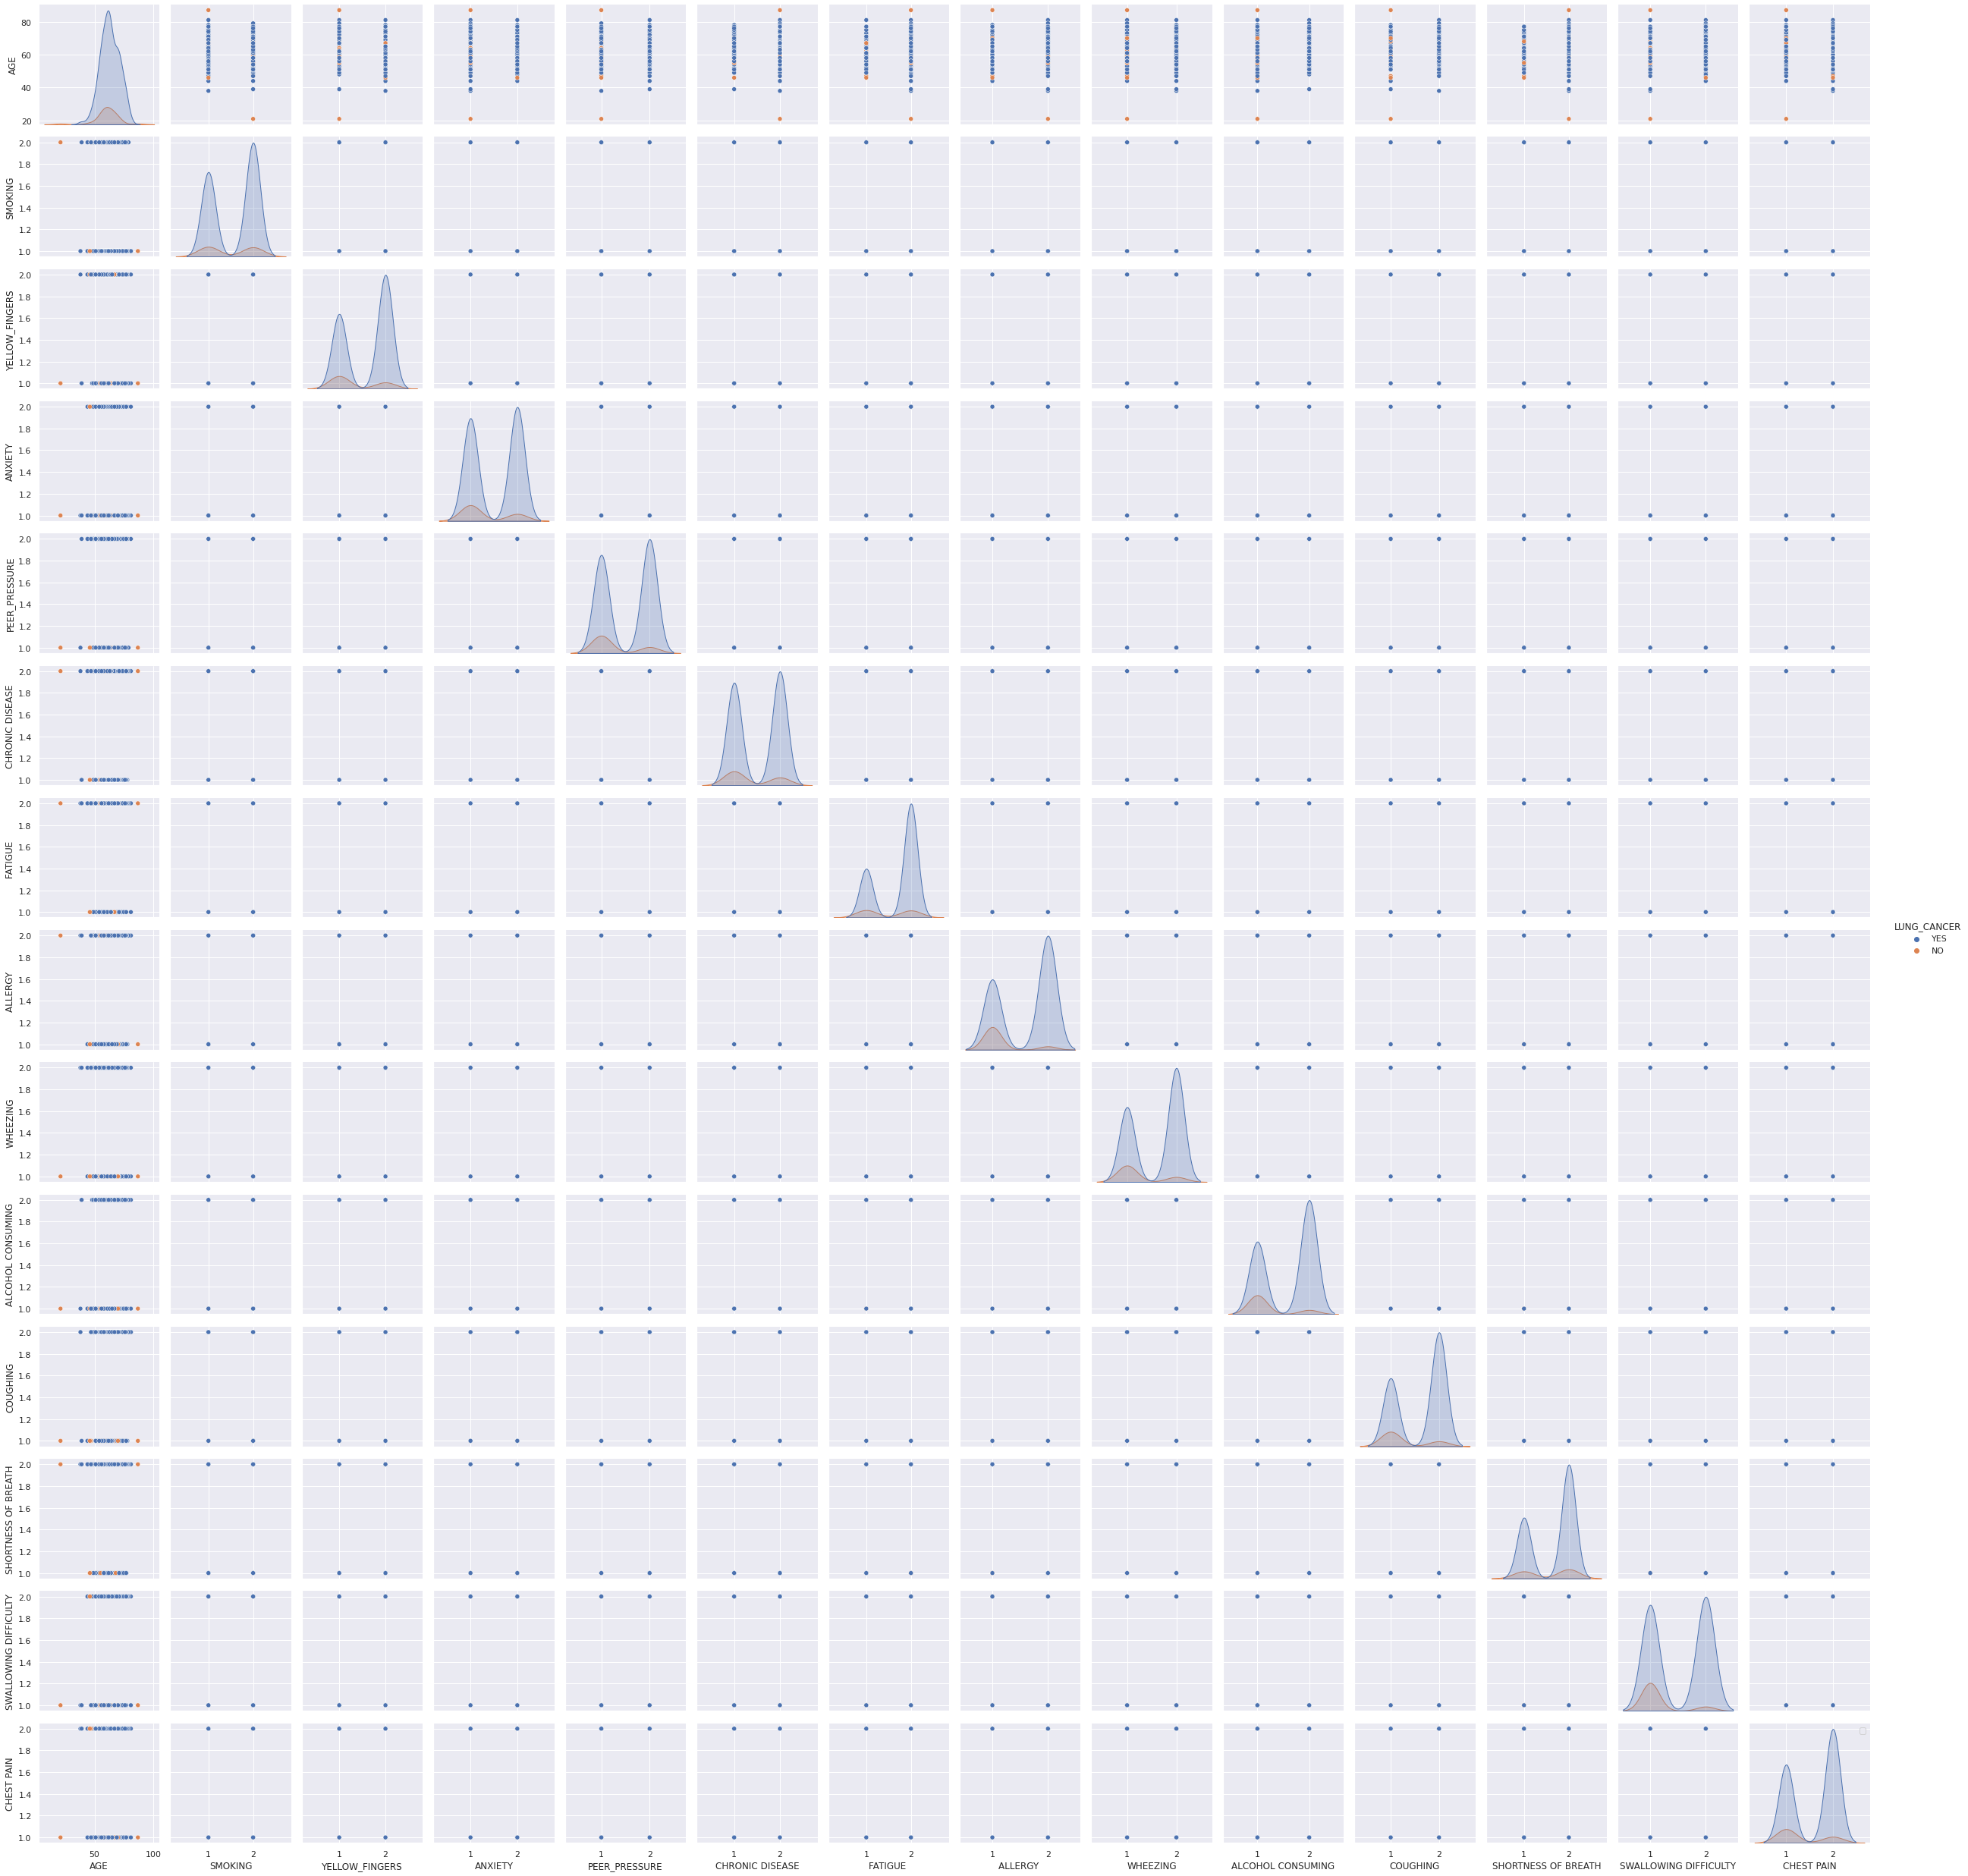

In [15]:
#look at how target is distributed among variables
sns.pairplot(df,hue='LUNG_CANCER')
plt.legend()
plt.show()

In [16]:
#remove target variable from categorical array
categorical.remove('LUNG_CANCER')

#change dtype of categorical features to object
df[categorical]=df[categorical].astype('object')

#copy of variables and target
X = df.copy()
y = X.pop('LUNG_CANCER')

In [17]:
X.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 309 entries, 0 to 308
Data columns (total 15 columns):
 #   Column                 Non-Null Count  Dtype 
---  ------                 --------------  ----- 
 0   GENDER                 309 non-null    object
 1   AGE                    309 non-null    int64 
 2   SMOKING                309 non-null    object
 3   YELLOW_FINGERS         309 non-null    object
 4   ANXIETY                309 non-null    object
 5   PEER_PRESSURE          309 non-null    object
 6   CHRONIC DISEASE        309 non-null    object
 7   FATIGUE                309 non-null    object
 8   ALLERGY                309 non-null    object
 9   WHEEZING               309 non-null    object
 10  ALCOHOL CONSUMING      309 non-null    object
 11  COUGHING               309 non-null    object
 12  SHORTNESS OF BREATH    309 non-null    object
 13  SWALLOWING DIFFICULTY  309 non-null    object
 14  CHEST PAIN             309 non-null    object
dtypes: int64(1), object(14)

In [18]:
X_mi = X.copy()

In [19]:
#label encoding for categorical variables
for colname in X_mi.select_dtypes("object"):
    X_mi[colname], _ = X_mi[colname].factorize()

X_mi['AGE']=X_mi['AGE'].astype('float64')

#all discrete features have int dtypes
discrete_features = X_mi.dtypes == int

In [20]:
discrete_features

GENDER                    True
AGE                      False
SMOKING                   True
YELLOW_FINGERS            True
ANXIETY                   True
PEER_PRESSURE             True
CHRONIC DISEASE           True
FATIGUE                   True
ALLERGY                   True
WHEEZING                  True
ALCOHOL CONSUMING         True
COUGHING                  True
SHORTNESS OF BREATH       True
SWALLOWING DIFFICULTY     True
CHEST PAIN                True
dtype: bool

In [21]:
#use classification since the target variable is discrete
from sklearn.feature_selection import mutual_info_classif

#define a function to produce mutual information scores
def make_mi_scores(X_mi, y, discrete_features):
    mi_scores = mutual_info_classif(X_mi, y, discrete_features=discrete_features)
    mi_scores = pd.Series(mi_scores, name="MI Scores", index=X_mi.columns)
    mi_scores = mi_scores.sort_values(ascending=False)
    return mi_scores

#compute mutual information scores
mi_scores = make_mi_scores(X_mi, y, discrete_features)
mi_scores

ALLERGY                  0.057504
ALCOHOL CONSUMING        0.043414
SWALLOWING DIFFICULTY    0.037858
WHEEZING                 0.031806
COUGHING                 0.031021
AGE                      0.030342
CHEST PAIN               0.018221
PEER_PRESSURE            0.018029
YELLOW_FINGERS           0.016365
ANXIETY                  0.010750
FATIGUE                  0.010725
CHRONIC DISEASE          0.006217
GENDER                   0.002261
SHORTNESS OF BREATH      0.001804
SMOKING                  0.001680
Name: MI Scores, dtype: float64

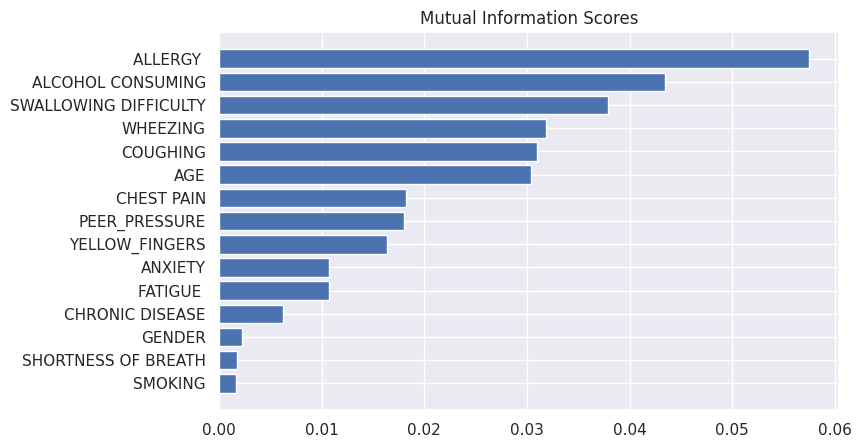

In [22]:
#define a function to plot mutual information scores
def plot_mi_scores(scores):
    scores = scores.sort_values(ascending=True)
    width = np.arange(len(scores))
    ticks = list(scores.index)
    plt.barh(width, scores)
    plt.yticks(width, ticks)
    plt.title("Mutual Information Scores")

#plot the scores
plt.figure(dpi=100, figsize=(8, 5))
plot_mi_scores(mi_scores)

Ini adalah pengkodingan untuk  proses modelling dari sistem HO-LUNG

In [23]:
#import libraries
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler

In [24]:
#get feature names
X = pd.concat([X[numerical],pd.get_dummies(X[categorical])],axis=1)
feature_names = X.columns

# train/test split with stratify making sure classes are evenlly represented across splits
X_train, X_test, y_train, y_test = train_test_split(X, y, stratify=y, train_size=0.75, random_state=1)

#define scaler
scaler=MinMaxScaler()

#apply preprocessing to split data with scaler
X_train[numerical] = scaler.fit_transform(X_train[numerical])
X_test[numerical] = scaler.transform(X_test[numerical])

In [25]:
from sklearn.model_selection import cross_val_score
from numpy import mean, std
from sklearn.naive_bayes import GaussianNB
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC

In [26]:
#logistic regression with five-fold cross validation
lr = LogisticRegression(max_iter = 2000)
cv = cross_val_score(lr,X_train,y_train,cv=5)
print(mean(cv), '+/-', std(cv))

0.9308048103607771 +/- 0.0158848177577188


In [27]:
#random forest classifier with five-fold cross validation
rf = RandomForestClassifier(random_state = 1)
cv = cross_val_score(rf,X_train,y_train,cv=5)
print(mean(cv), '+/-', std(cv))

0.9350601295097132 +/- 0.013760232121339587


In [28]:
#support vector classifier with five-fold cross validation
svc = SVC(probability = True)
cv = cross_val_score(svc,X_train,y_train,cv=5)
print(mean(cv), '+/-', std(cv))

0.9351526364477335 +/- 0.023485469326540147


In [29]:
#ml algorithm tuner
from sklearn.model_selection import GridSearchCV 

#performance reporting function
def clf_performance(classifier, model_name):
    print(model_name)
    print('Best Score: {} +/- {}'.format(str(classifier.best_score_),str(classifier.cv_results_['std_test_score'][classifier.best_index_])))
    print('Best Parameters: ' + str(classifier.best_params_))

In [30]:
#logistic regression performance tuner
lr = LogisticRegression()
param_grid = {'max_iter' : [15000],
              'C' : np.arange(.1,.6,.1)
             }
clf_lr = GridSearchCV(lr, param_grid = param_grid, cv = 5, n_jobs = -1)
best_clf_lr = clf_lr.fit(X_train,y_train)
clf_performance(best_clf_lr,'Logistic Regression')

Logistic Regression
Best Score: 0.9264569842738206 +/- 0.01712752904500742
Best Parameters: {'C': 0.30000000000000004, 'max_iter': 15000}


In [31]:
#random forest performance tuner
rf = RandomForestClassifier(random_state = 1)
param_grid =  {
                'n_estimators': np.arange(8,20,2), 
                'bootstrap': [True,False], #bagging (T) vs. pasting (F)
                'max_depth': [10],
                'max_features': ['auto','sqrt'],
#                 'min_samples_leaf': np.arange(2,6,1),
#                 'min_samples_split': np.arange(2,6,1)
              }
clf_rf_rnd = GridSearchCV(rf, param_grid = param_grid, cv = 5, n_jobs = -1)
best_clf_rf_rnd = clf_rf_rnd.fit(X_train,y_train)
clf_performance(best_clf_rf_rnd,'Random Forest')

Random Forest
Best Score: 0.9394079555966698 +/- 0.021250436398270147
Best Parameters: {'bootstrap': True, 'max_depth': 10, 'max_features': 'auto', 'n_estimators': 10}


In [32]:
#support vector classifier performance tuner
svc = SVC(probability = True, random_state = 1)
param_grid = {
              'kernel': ['linear', 'poly', 'sigmoid','rbf'],
              'gamma': [1, 1e-1, 1e-2, 1e-3, 1e-4],
              'C': np.arange(40,70,5)
             }
clf_svc = GridSearchCV(svc, param_grid = param_grid, cv = 5, n_jobs = -1)
best_clf_svc = clf_svc.fit(X_train,y_train)
clf_performance(best_clf_svc,'Support Vector Classifier')

Support Vector Classifier
Best Score: 0.9438482886216466 +/- 0.016747588503435138
Best Parameters: {'C': 50, 'gamma': 1, 'kernel': 'linear'}


In [33]:
#import evaluation tools
from sklearn.metrics import accuracy_score,precision_score, matthews_corrcoef, confusion_matrix, classification_report
!pip install scikit-plot
import scikitplot as skplt

In [34]:
lr = LogisticRegression(C= 0.3, max_iter= 15000)
lr.fit(X_train, y_train)

y_pred_lr = lr.predict(X_test)

#assess accuracy
print('LogisticRegression test accuracy: {}'.format(accuracy_score(y_test, y_pred_lr)))

LogisticRegression test accuracy: 0.8461538461538461


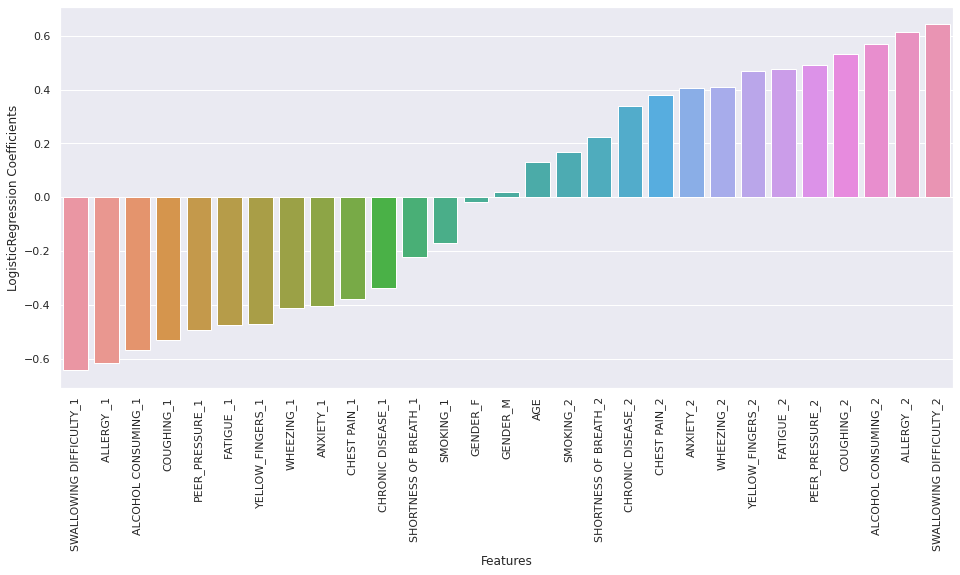

In [35]:
lr_coefficients = pd.DataFrame([lr.coef_[0]], columns = feature_names)
sorted_lr = lr_coefficients.iloc[:, np.argsort(lr_coefficients.loc[0])]

plt.figure(figsize=(16,7))
sns.barplot(x=sorted_lr.columns, y=sorted_lr.iloc[0,:])
plt.xticks(rotation = 90)
plt.xlabel('Features')
plt.ylabel('LogisticRegression Coefficients')
plt.show()

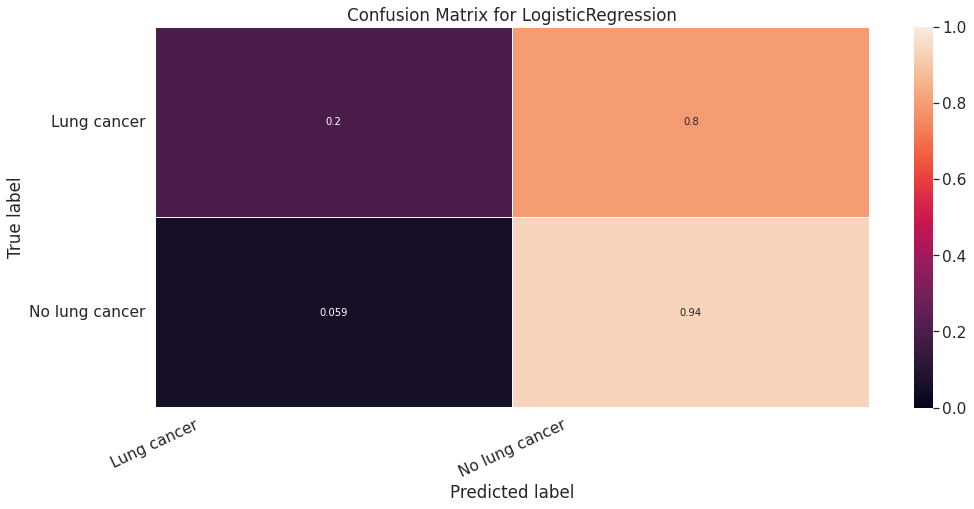

In [36]:
#create and reshape confusion matrix data
matrix = confusion_matrix(y_test, y_pred_lr)
matrix = matrix.astype('float') / matrix.sum(axis=1)[:, np.newaxis]

#plot as heatmap
plt.figure(figsize=(16,7))
sns.set(font_scale=1.4)
sns.heatmap(matrix, annot=True, annot_kws={'size':10},
            linewidths=0.2, vmin=0, vmax=1)

#plot settings
class_names = ['Lung cancer', 'No lung cancer']
tick_marks = np.arange(len(class_names))
tick_marks2 = tick_marks + 0.5
plt.xticks(tick_marks, class_names, rotation=25)
plt.yticks(tick_marks2, class_names, rotation=0)
plt.xlabel('Predicted label')
plt.ylabel('True label')
plt.title('Confusion Matrix for LogisticRegression')
plt.show()

In [37]:
print('LogisticRegression')
print(classification_report(y_test, y_pred_lr))

LogisticRegression
              precision    recall  f1-score   support

          NO       0.33      0.20      0.25        10
         YES       0.89      0.94      0.91        68

    accuracy                           0.85        78
   macro avg       0.61      0.57      0.58        78
weighted avg       0.82      0.85      0.83        78



In [38]:
#create support vector classifier model with tuned parameters
svc = SVC(probability = True, random_state = 1,C= 50, gamma = 1, kernel= 'linear')
svc.fit(X_train,y_train)
y_pred_svc = svc.predict(X_test)

#assess accuracy
print('SVC test accuracy: {}'.format(accuracy_score(y_test, y_pred_svc)))

SVC test accuracy: 0.8974358974358975


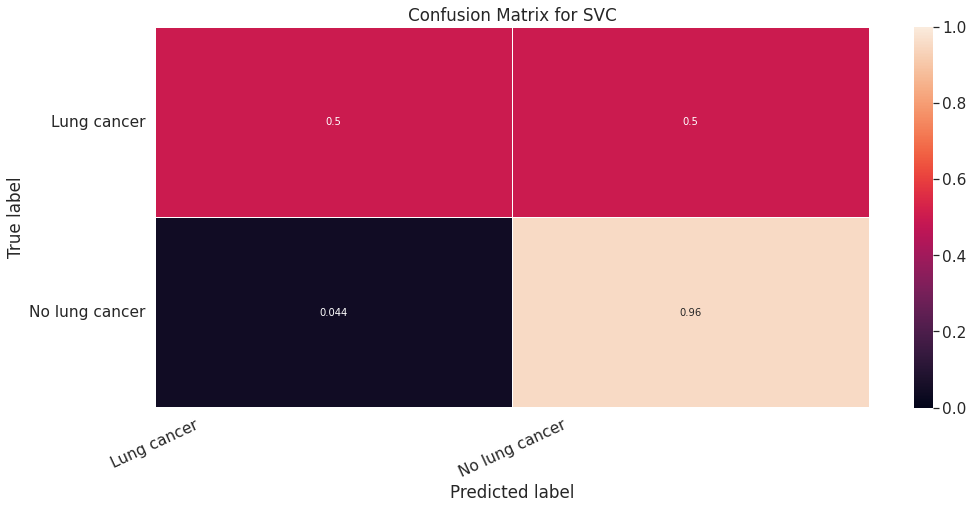

In [39]:
#create and reshape confusion matrix data
matrix = confusion_matrix(y_test, y_pred_svc)
matrix = matrix.astype('float') / matrix.sum(axis=1)[:, np.newaxis]

#plot as heatmap
plt.figure(figsize=(16,7))
sns.set(font_scale=1.4)
sns.heatmap(matrix, annot=True, annot_kws={'size':10},
            linewidths=0.2, vmin=0, vmax=1)

#plot settings
class_names = ['Lung cancer', 'No lung cancer']
tick_marks = np.arange(len(class_names))
tick_marks2 = tick_marks + 0.5
plt.xticks(tick_marks, class_names, rotation=25)
plt.yticks(tick_marks2, class_names, rotation=0)
plt.xlabel('Predicted label')
plt.ylabel('True label')
plt.title('Confusion Matrix for SVC')
plt.show()

In [40]:
print('SVC')
print(classification_report(y_test, y_pred_svc))

SVC
              precision    recall  f1-score   support

          NO       0.62      0.50      0.56        10
         YES       0.93      0.96      0.94        68

    accuracy                           0.90        78
   macro avg       0.78      0.73      0.75        78
weighted avg       0.89      0.90      0.89        78



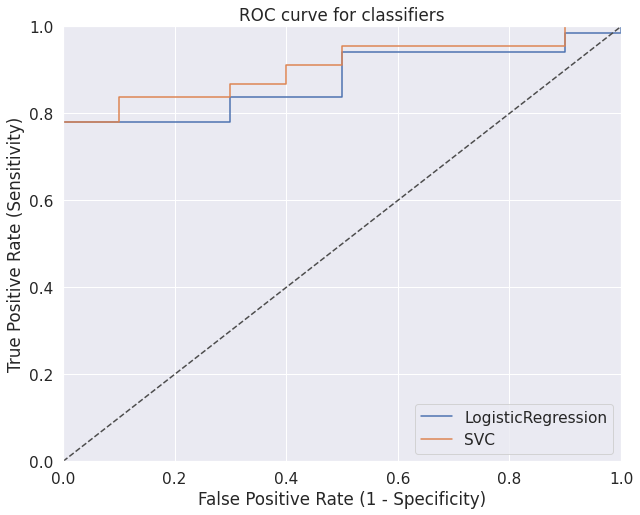

In [41]:
#plot ROC curve for best classifiers
from sklearn import metrics

pred_prob_lr = lr.predict_proba(X_test)
pred_prob_svc = svc.predict_proba(X_test)

fpr_lr, tpr_lr, thresholds_lr = metrics.roc_curve(y_test, pred_prob_lr[:,1],pos_label='YES')
fpr_svc, tpr_svc, thresholds_svc = metrics.roc_curve(y_test, pred_prob_svc[:,1],pos_label='YES')

fig, ax = plt.subplots(figsize=(10, 8))
ax.plot(fpr_lr, tpr_lr, label='LogisticRegression')
ax.plot(fpr_svc, tpr_svc, label='SVC')
ax.plot([0, 1], [0, 1], transform=ax.transAxes, ls="--", c=".3")
plt.legend()
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.0])
plt.rcParams['font.size'] = 12
plt.title('ROC curve for classifiers')
plt.xlabel('False Positive Rate (1 - Specificity)')
plt.ylabel('True Positive Rate (Sensitivity)')
plt.show()

In [42]:
#calculate AUC for classifiers
print('LogisticRegression AUC: {}'.format(metrics.auc(fpr_lr, tpr_lr)))
print('SVC AUC: {}'.format(metrics.auc(fpr_svc, tpr_svc)))

LogisticRegression AUC: 0.8764705882352941
SVC AUC: 0.9058823529411765


In [43]:
!pip install eli5
import eli5
from eli5.sklearn import PermutationImportance

     |████████████████████████████████| 106 kB 7.0 MB/s 


In [44]:
#determine feature weights
perm = PermutationImportance(svc, random_state=1).fit(X_test, y_test)
!pip install shapeli5.show_weights(perm, feature_names = list(feature_names), top=len(feature_names))

/bin/bash: -c: line 0: syntax error near unexpected token `('
/bin/bash: -c: line 0: `pip install shapeli5.show_weights(perm, feature_names = list(feature_names), top=len(feature_names))'


In [45]:
!pip install shap
import shap

     |████████████████████████████████| 356 kB 8.3 MB/s 
  Created wheel for shap: filename=shap-0.39.0-cp37-cp37m-linux_x86_64.whl size=491640 sha256=68634efa5b5553d2062aa2bef5f3307c44fa28401ce0d5937d41501b5bece24c
  Stored in directory: /root/.cache/pip/wheels/ca/25/8f/6ae5df62c32651cd719e972e738a8aaa4a87414c4d2b14c9c0
Successfully built shap


Using 231 background data samples could cause slower run times. Consider using shap.sample(data, K) or shap.kmeans(data, K) to summarize the background as K samples.


  0%|          | 0/78 [00:00<?, ?it/s]

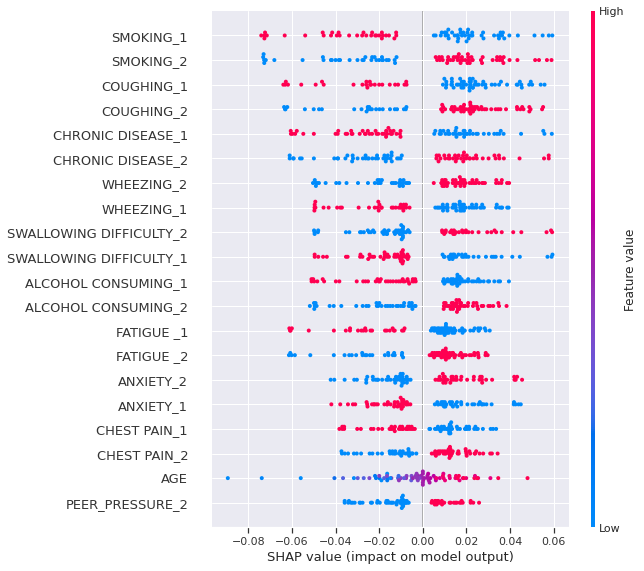

In [46]:
#create object that can calculate shap values
explainer = shap.KernelExplainer(svc.predict_proba, X_train)

pred_data = pd.DataFrame(X_test)

pred_data.columns = feature_names

data_for_prediction = pred_data

#calculate Shap values
shap_values = explainer.shap_values(data_for_prediction)

shap.initjs()
shap.summary_plot(shap_values[1], data_for_prediction)